# Guided Project:
### Creating a Kaggle Workflow

## Introduction to Data Science Workflows

So far in this course, you've been learning about Kaggle competitions using Dataquest missions. Missions are highly structured and your work is answer checked every step of the way.<br>

In this guided project, we're going to put together all that we've learned in this course and create a **data science workflow**.<br>

Data science, and particularly machine learning, contain many dimensions of complexity when compared with standard software development. In standard software development, code not working as you expect can be caused by a number of factors along two dimensions:
* Bugs in implementation
* Algorithm design

Machine learning problems, have many more dimensions:
* Bugs in implementation
* Algorithm design
* Model issues
* Data quality

The result of this is that there are exponentially more places that machine learning can go wrong.

![https://s3.amazonaws.com/dq-content/188/why-is-ml-hard.png](https://s3.amazonaws.com/dq-content/188/why-is-ml-hard.png)

This concept is shown in the diagram above (taken from the excellent post [Why is machine learning 'hard'?](http://ai.stanford.edu/~zayd/why-is-machine-learning-hard.html)). The green dot is a 'correct' solution, where the red dots are incorrect solutions. In this illustration there are only a small number of incorrect combinations for software engineering, but in machine learning this becomes exponentially greater!<br>

By defining a workflow for yourself, you can give yourself a framework with which to make iterating on ideas quicker and easier, allowing yourself to work more efficiently.<br>

In this mission, we're going to explore a workflow to make competing in the Kaggle Titanic competition easier, using a pipeline of functions to reduce the number of dimensions you need to focus on.<br>

To get started, we'll read in the original train.csv and test.csv files from Kaggle.

* Import the pandas library.
* Use pandas to import the file `train.csv` as train.
* Use pandas to import the file `test.csv` as holdout.
* Display the first few lines of the `test` dataframe.

In [11]:
import pandas as pd
import numpy as np

In [12]:
train = pd.read_csv('train.csv')
holdout = pd.read_csv('test.csv')

In [13]:
holdout.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Preprocessing the Data

One of the many benefits of using Jupyter is that (by default) it uses the [IPython kernel](http://ipython.readthedocs.io/en/stable/) to run code. This gives you all the benefits of IPython, including code completion and 'magic' commands. (If you'd like to read more about the internals of Jupyter and how it can help you work more efficiently, you might like to check out our blog post [Jupyter Notebook Tips, Tricks and Shortcuts](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/).)<br>

We can use one of those magic commands, [the `%load` command](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-load), to load an external file. The `%load` command will copy the contents of the file into the current notebook cell. The syntax is simple:

```python
%load [filename]
```

To illustrate, say we had a file called `test.py` with the following line of code:

```python
print("This is test.py")
```

To use load, we simply type the following into a Jupyter cell:

```python
%load test.py
```

Once we run that cell, the contents from the `test.py` file would be copied into the cell:

```python
# %load test.py
print("This is test.py")
```

If we ran the cell one more time, the code would run, giving us the output This is `test.py`.<br>

We have created a file, `functions.py` which contains versions of the functions we created in the earlier missions form this course, which will save you building those functions again from scratch.<br>

Let's import that file and preprocess our Kaggle data.

* Use the `%load` magic command to load the contents of `functions.py` into a notebook cell and read through the functions you have imported.
* Create a new function, which:
  * Accepts a dataframe parameter
  * Applies the `process_missing()`, `process_age()`, `process_fare()`, `process_titles()`, and `process_cabin()` functions to the dataframe
  * Applies the `create_dummies()` function to the `"Age_categories"`, `"Fare_categories"`,`"Title"`, `"Cabin_type"`, and `"Sex"` columns.
  * Returns the processed dataframe
* Apply the newly create function on the `train` and `holdout` dataframes.

In [14]:
# %load functions.py
def process_missing(df):
    """Handle various missing values from the data set

    Usage
    ------

    holdout = process_missing(holdout)
    """
    df["Fare"] = df["Fare"].fillna(train["Fare"].mean())
    df["Embarked"] = df["Embarked"].fillna("S")
    return df

def process_age(df):
    """Process the Age column into pre-defined 'bins' 

    Usage
    ------

    train = process_age(train)
    """
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def process_fare(df):
    """Process the Fare column into pre-defined 'bins' 

    Usage
    ------

    train = process_fare(train)
    """
    cut_points = [-1,12,50,100,1000]
    label_names = ["0-12","12-50","50-100","100+"]
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

def process_cabin(df):
    """Process the Cabin column into pre-defined 'bins' 

    Usage
    ------

    train process_cabin(train)
    """
    df["Cabin_type"] = df["Cabin"].str[0]
    df["Cabin_type"] = df["Cabin_type"].fillna("Unknown")
    df = df.drop('Cabin',axis=1)
    return df

def process_titles(df):
    """Extract and categorize the title from the name column 

    Usage
    ------

    train = process_titles(train)
    """
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Master" :     "Master",
        "Mlle":        "Miss",
        "Miss" :       "Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Royalty",
        "Don":         "Royalty",
        "Sir" :        "Royalty",
        "Countess":    "Royalty",
        "Dona":        "Royalty",
        "Lady" :       "Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title"] = extracted_titles.map(titles)
    return df

def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column

    Usage
    ------

    train = create_dummies(train,"Age")
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [15]:
type(create_dummies)

function

In [16]:
def preprocess_and_get_dummies(df):
    
    functions = [process_missing, process_age, process_fare,
                process_titles, process_cabin]
    columns_to_dummies = ['Age_categories', "Fare_categories",
                         "Title", "Cabin_type", "Sex"]
    
    for func in functions:
        df = func(df)
        
    for col_to_dum in columns_to_dummies:
        df = create_dummies(df, col_to_dum)
        
    return df
    

In [17]:
train = preprocess_and_get_dummies(train)
holdout = preprocess_and_get_dummies(holdout)

## Exploring the Data

In the first three missions of this course, we have done a variety of activities, mostly in isolation: Exploring the data, creating features, selecting features, selecting and tuning different models.<br>

The Kaggle workflow we are going to build will combine all of these into a process.

![https://s3.amazonaws.com/dq-content/188/kaggle_workflow.svg](https://s3.amazonaws.com/dq-content/188/kaggle_workflow.svg)

* **Data exploration**, to find patterns in the data
* **Feature engineering**, to create new features from those patterns or through pure experimentation
* **Feature selection**, to select the best subset of our current set of features
* **Model selection/tuning**, training a number of models with different hyperparameters to find the best performer.

We can continue to repeat this cycle as we work to optimize our predictions. At the end of any cycle we wish, we can also use our model to make predictions on the holdout set and then **Submit to Kaggle** to get a leaderboard score.<br>

While the first two steps of our workflow are relatively freeform, later in this project we'll create some functions that will help automate the complexity of the latter two steps so we can move faster.<br>

For now, let's practice the first stage, exploring the data. We're going to examine the two columns that contain information about the family members each passenger had onboard: `SibSp` and `Parch`.<br>

If you need some help with techniques for exploring and visualizing data, you might like to check out our [Data Analysis with Pandas](https://www.dataquest.io/course/data-analysis-intermediate) and [Exploratory Data Visualization](https://www.dataquest.io/course/exploratory-data-visualization) courses.

* Review the data dictionary and variable notes for the Titanic competition on Kaggle's website to familiarize yourself with the `SibSp` and `Parch` columns.
* Use [pandas](http://pandas.pydata.org/pandas-docs/stable/) and [matplotlib](https://matplotlib.org/api/pyplot_summary.html) to explore those two columns. You might like to try:
  * Inspecting the type of the columns
  * Using histograms to view the distribution of values in the columns
  * Use pivot tables to look at the survival rate for different values of the columns
  * Find a way to combine the columns and look at the resulting distribution of values and survival rate
* Write a markdown cell explaining your findings.

* `sibsp`	 : # of siblings / spouses aboard the Titanic	
* `parch`	 : # of parents / children aboard the Titanic	

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
print(train['SibSp'].dtype)
print(train['Parch'].dtype)

int64
int64


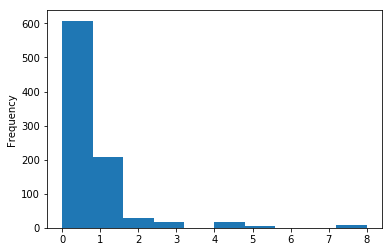

In [20]:
train['SibSp'].plot.hist();plt.show()

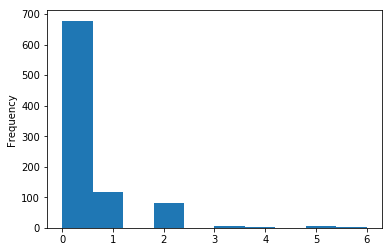

In [21]:
train['Parch'].plot.hist();plt.show()

In [22]:
table = pd.pivot_table(train, values='Survived', index=['SibSp'],
                      columns = ['Parch'], aggfunc=np.mean)

In [23]:
table

Parch,0,1,2,3,4,5,6
SibSp,,,,,,,
0,0.303538,0.657895,0.724138,1.000000,0.0,0.000000,NaN
1,0.520325,0.596491,0.631579,0.333333,0.0,0.333333,0.0
2,0.250000,0.857143,0.500000,1.000000,NaN,NaN,NaN
3,1.000000,0.000000,0.285714,NaN,NaN,NaN,NaN
4,NaN,0.000000,0.333333,NaN,NaN,NaN,NaN
5,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
8,NaN,NaN,0.000000,NaN,NaN,NaN,NaN


In [24]:
train_ = train.copy()

In [25]:
sibsp = train_['SibSp']
parch = train_['Parch']

In [26]:
train_['SibSpParch_plus'] = sibsp+parch
train_['SibSpParch_minus'] = sibsp - parch
train_['SibSpParch_mult'] = sibsp*parch

train_['SibSpParch_plus_sqrd'] = train_['SibSpParch_plus']**2
train_['SibSpParch_minus_sqrd'] = train_['SibSpParch_minus']**2
train_['SibSpParch_mult_sqrd'] = train_['SibSpParch_mult']**2

In [27]:
import seaborn as sns

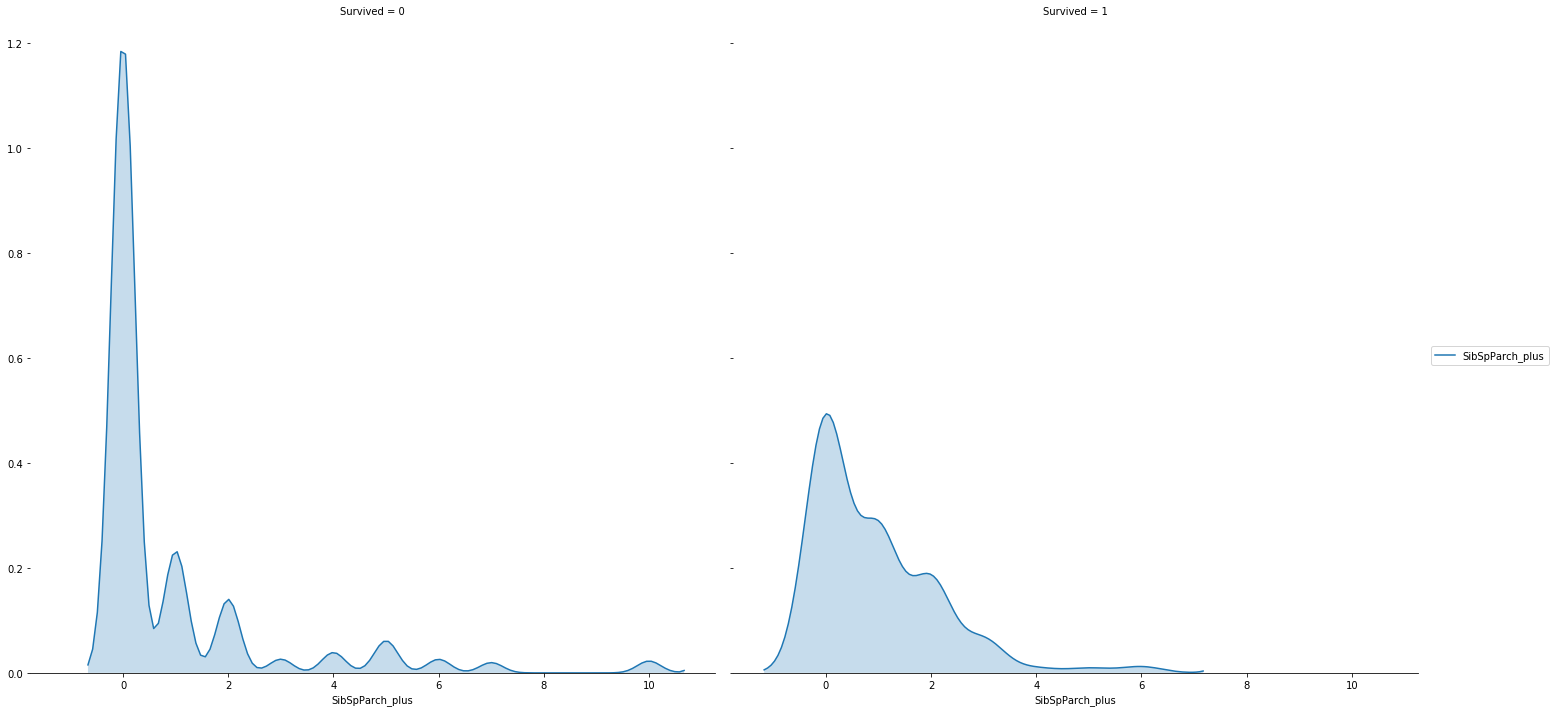

In [28]:
g = sns.FacetGrid(train_, col="Survived", size=10, col_wrap=2)
g.map(sns.kdeplot, "SibSpParch_plus", shade=True).add_legend()
sns.despine(left=True)
plt.show()

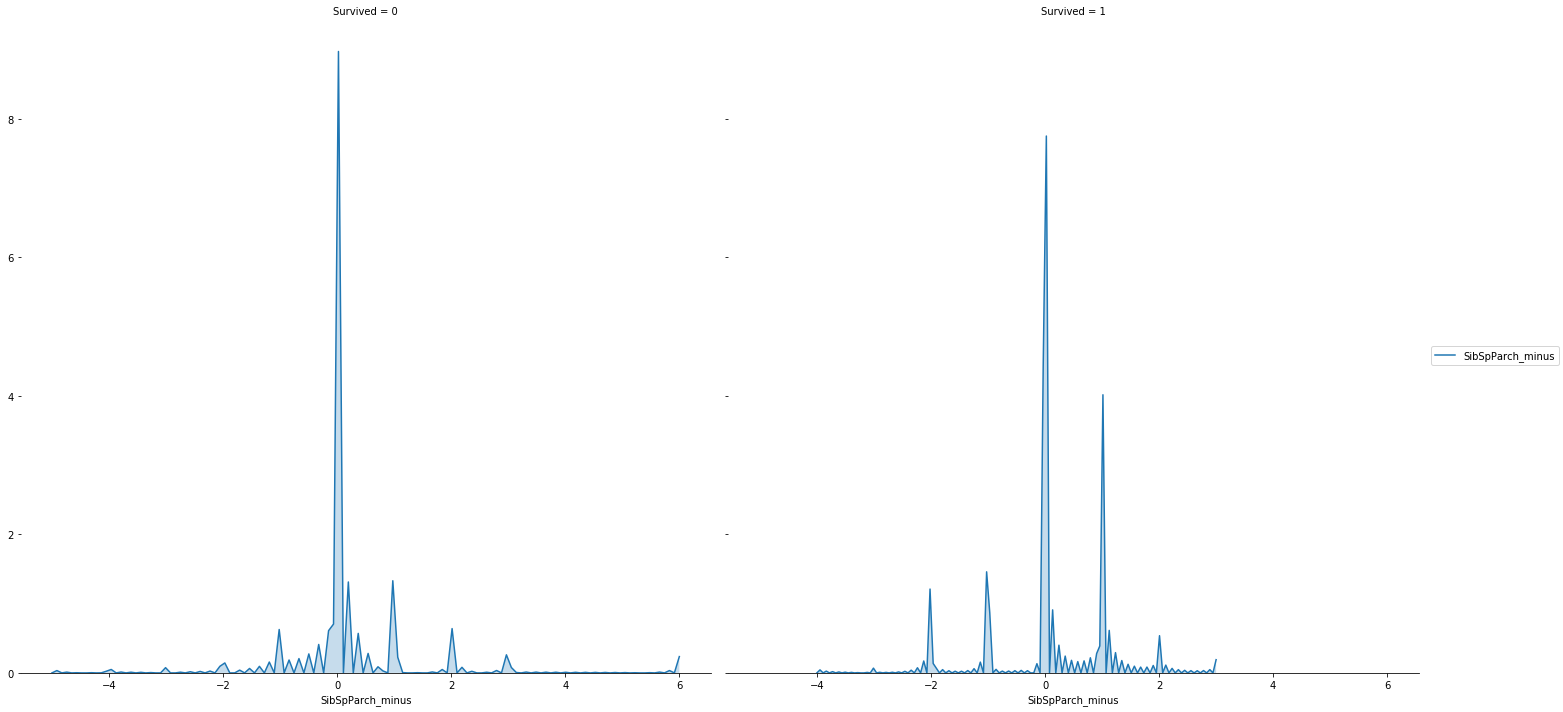

In [30]:
g = sns.FacetGrid(train_, col="Survived", size=10, col_wrap=2)
g.map(sns.kdeplot, "SibSpParch_minus", shade=True).add_legend()
sns.despine(left=True)
plt.show()

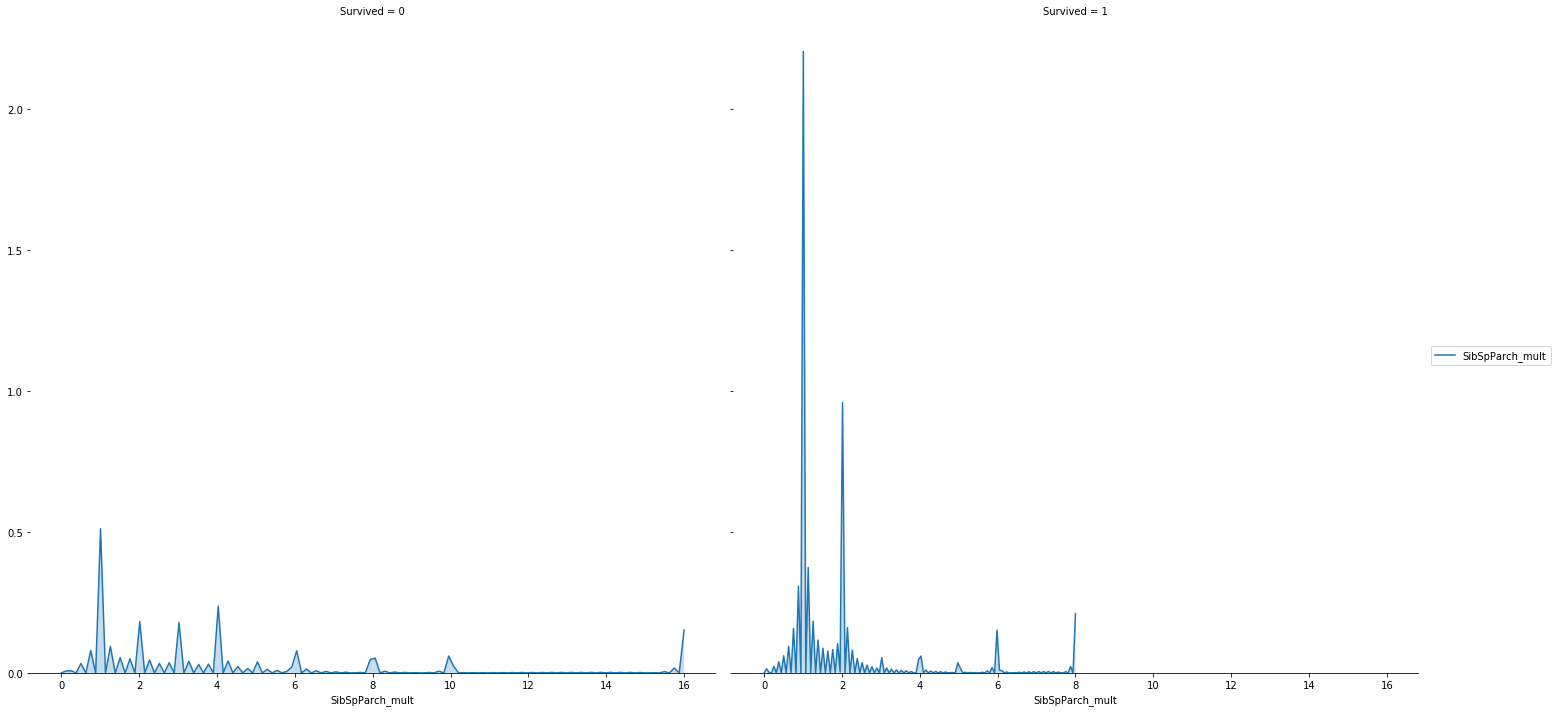

In [31]:
g = sns.FacetGrid(train_, col="Survived", size=10, col_wrap=2)
g.map(sns.kdeplot, "SibSpParch_mult", shade=True).add_legend()
sns.despine(left=True)
plt.show()

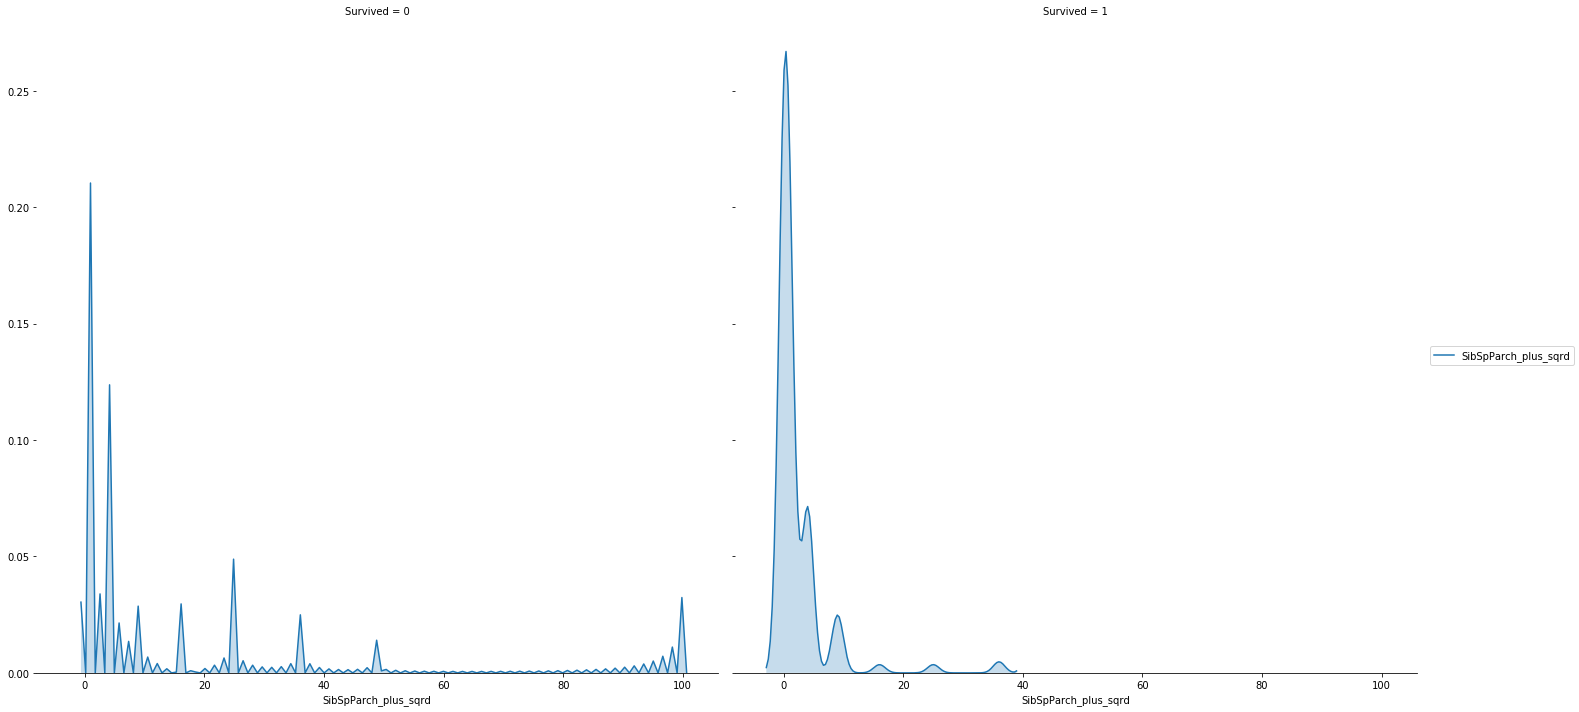

In [32]:
g = sns.FacetGrid(train_, col="Survived", size=10, col_wrap=2)
g.map(sns.kdeplot, "SibSpParch_plus_sqrd", shade=True).add_legend()
sns.despine(left=True)
plt.show()

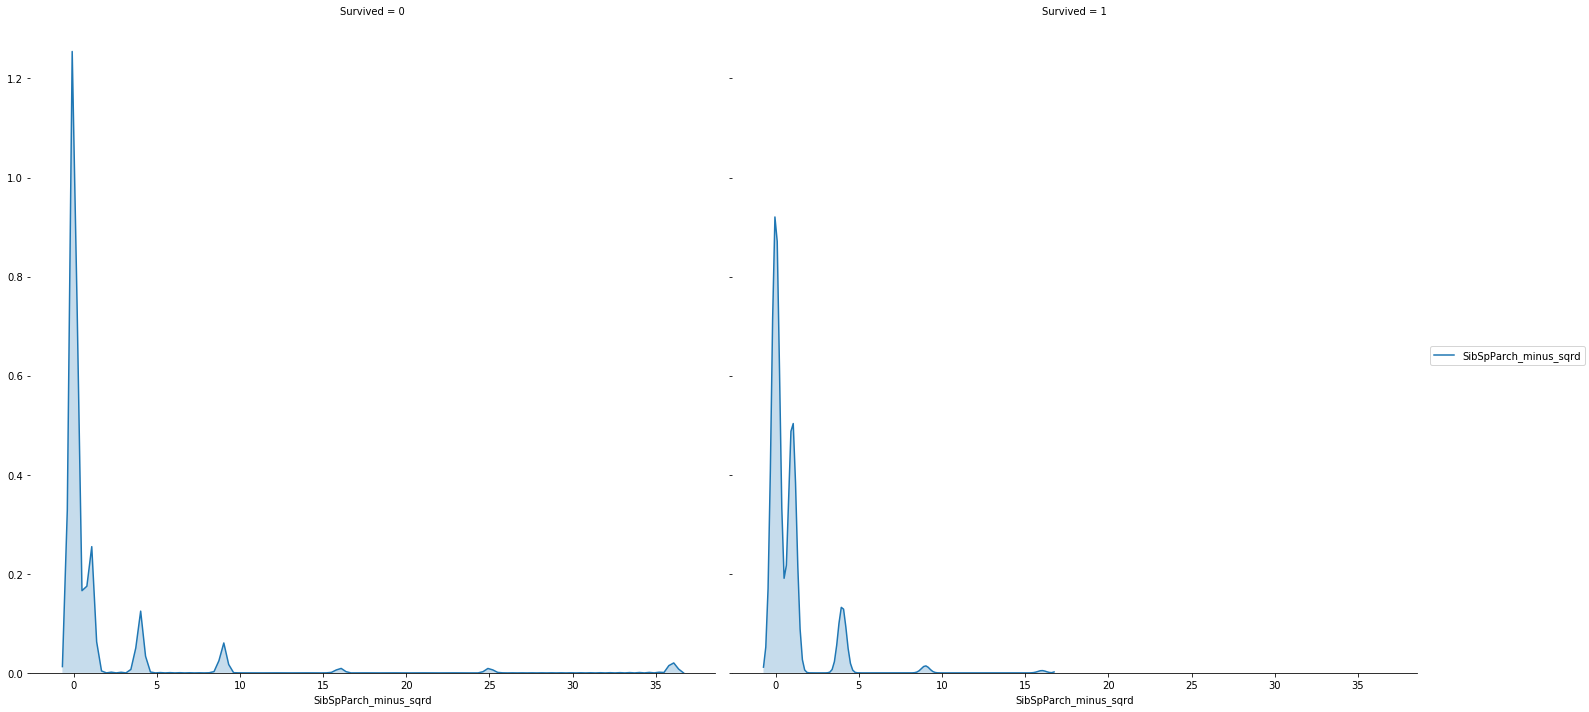

In [33]:
g = sns.FacetGrid(train_, col="Survived", size=10, col_wrap=2)
g.map(sns.kdeplot, "SibSpParch_minus_sqrd", shade=True).add_legend()
sns.despine(left=True)
plt.show()

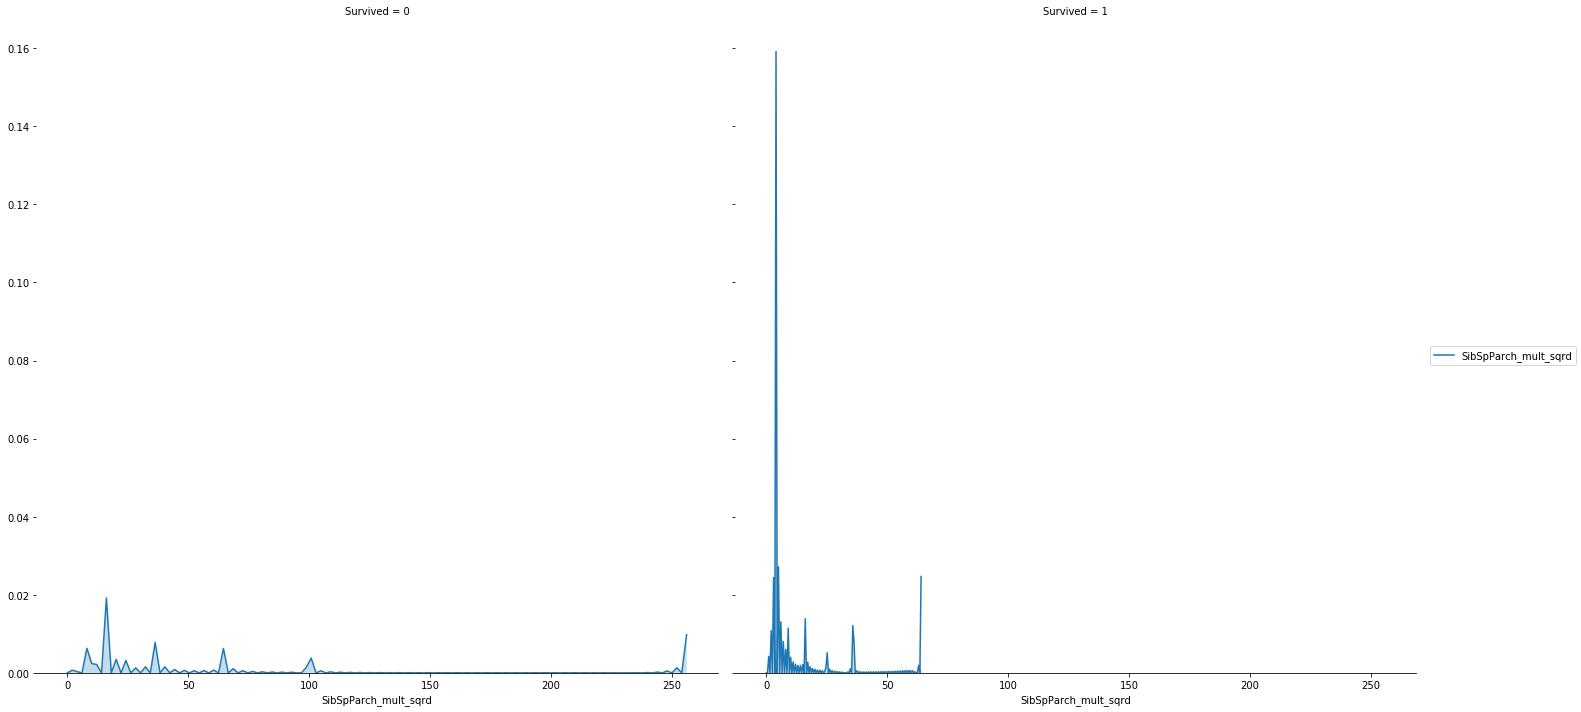

In [34]:
g = sns.FacetGrid(train_, col="Survived", size=10, col_wrap=2)
g.map(sns.kdeplot, "SibSpParch_mult_sqrd", shade=True).add_legend()
sns.despine(left=True)
plt.show()

### Note.

* We can see that there occurr significantly different distributions when we combine `SibSp` and `Parch` columns by `add`.

## Engineering New Features

You should have discovered in the previous step that by combining the values of `SibSp` and `Parch` into a single column, only 30% of the passengers who had no family members onboard survived.<br>

If you didn't get this conclusion, you can use the code segment below to verify this for yourself:

```python
explore_cols = ["SibSp","Parch","Survived"]
explore = train[explore_cols].copy()

explore['familysize'] = explore[["SibSp","Parch"]].sum(axis=1)
pivot = explore.pivot_table(index=col,values="Survived")
pivot.plot.bar(ylim=(0,1),yticks=np.arange(0,1,.1))
plt.show()
```
Based of this, we can come up with an idea for a new feature - was the passenger alone. This will be a binary column containing the value:

* `1` if the passenger has zero family members onboard
* `0` if the passenger has one or more family members onboard

Let's go ahead and create this feature.

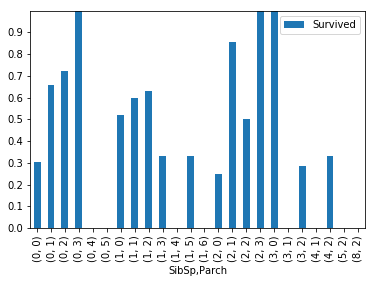

In [35]:
explore_cols = ["SibSp","Parch","Survived"]
explore = train[explore_cols].copy()

explore['familysize'] = explore[["SibSp","Parch"]].sum(axis=1)
pivot = explore.pivot_table(index=['SibSp', 'Parch'], values="Survived")
pivot.plot.bar(ylim=(0,1),yticks=np.arange(0,1,.1))
plt.show()

* Create a function, that:
  * Accepts a dataframe as input
  * Adds a new column, `isalone` that has the value `0` if the passenger has one or more family members onboard, and `1` if the passenger has zero family members onboard.
  * Returns the new dataframe
* Apply the newly created function to the `train` and `holdout` dataframes.

In [36]:
def create_isalone(df):
    df['isalone'] = (df['SibSp']+df['Parch']).apply(lambda x: 1 if x else 0)
    return df   

In [37]:
train = create_isalone(train)
holdout = create_isalone(holdout)

In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_T,Cabin_type_Unknown,Sex_female,Sex_male,isalone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,1,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,0,0,0,0,0,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,1,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,0,0,0,0,0,0,1,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,1,0,1,0


## Selecting the Best-performing Features

The next step in our workflow is feature selection. In the [Feature Preparation, Selection and Engineering](https://www.dataquest.io/m/186/feature-preparation-selection-and-engineering) mission, we used scikit-learn's [`feature_selection.RFECV` class](https://www.dataquest.io/m/188/guided-project%3A-creating-a-kaggle-workflow/5/scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html) to automate selecting the best-performing features using recursive feature elimination.<br>

To speed up our Kaggle workflow, we can create a function that performs this step for us, which will mean we can perform feature selection by calling a self-contained function and focus our efforts on the more creative part - exploring the data and engineering new features.<br>

You may remember that the first parameter when you instantiate a `RFECV()` object is an estimator. At the time we used a Logistic Regression estimator, but we've since discovered in the [Model Selection and Tuning](https://www.dataquest.io/m/187/model-selection-and-tuning) mission that Random Forests seems to be a better algorithm for this Kaggle competition.<br>

Let's write a function that:

* Accepts a dataframe as input
* Performs data preparation for machine learning
* Uses recursive feature elimination and the random forests algorithm to find the best-performing set of features

* Import `feature_selection.RFECV` and `ensemble.RandomForestClassifier`
* Create a function, `select_features()`, that:
  * Accepts a dataframe as input
  * Removes any non-numeric columns or columns containing null values
  * Creates `all_X` and `all_y` variables, making sure that `all_X` contains neither the `PassengerId` or `Survived` columns.
  * Uses `feature_selection.RFECV` and `ensemble.RandomForestClassifier` to perform recursive feature elimination using:
    * `all_X` and `all_y`
    * A random state of `1`
    * 10 fold cross validation
  * Prints a list of the best columns from recursive feature elimination
  * Returns a list of the best columns from recursive feature elimination
* Run the newly created function using the `train` dataframe as input and assign the result to a variable.

In [39]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

In [40]:
def select_features(df):
    
    df = df.select_dtypes(exclude=['object', 'category'])
    df = df.dropna(how='any', axis=1)
    
    all_X = df.drop(['PassengerId', 'Survived'], axis=1)
    all_y = df['Survived']
    
    rf = RandomForestClassifier(random_state=1)
    rfecv = RFECV(rf, cv=10)
    
    rfecv.fit(all_X, all_y)
    
    best_features = list(all_X.columns[rfecv.support_])
    
    print(best_features)
    return best_features

In [41]:
select_features(train)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Age_categories_Missing', 'Age_categories_Infant', 'Age_categories_Child', 'Age_categories_Teenager', 'Age_categories_Young Adult', 'Age_categories_Adult', 'Fare_categories_0-12', 'Fare_categories_12-50', 'Fare_categories_50-100', 'Fare_categories_100+', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Cabin_type_B', 'Cabin_type_C', 'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_Unknown', 'Sex_female', 'Sex_male', 'isalone']


['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Age_categories_Missing',
 'Age_categories_Infant',
 'Age_categories_Child',
 'Age_categories_Teenager',
 'Age_categories_Young Adult',
 'Age_categories_Adult',
 'Fare_categories_0-12',
 'Fare_categories_12-50',
 'Fare_categories_50-100',
 'Fare_categories_100+',
 'Title_Master',
 'Title_Miss',
 'Title_Mr',
 'Cabin_type_B',
 'Cabin_type_C',
 'Cabin_type_D',
 'Cabin_type_E',
 'Cabin_type_Unknown',
 'Sex_female',
 'Sex_male',
 'isalone']

In [42]:
best_features = select_features(train)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Age_categories_Missing', 'Age_categories_Infant', 'Age_categories_Child', 'Age_categories_Teenager', 'Age_categories_Young Adult', 'Age_categories_Adult', 'Fare_categories_0-12', 'Fare_categories_12-50', 'Fare_categories_50-100', 'Fare_categories_100+', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Cabin_type_B', 'Cabin_type_C', 'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_Unknown', 'Sex_female', 'Sex_male', 'isalone']


## Selectign and Tuning Different Algorithms

Just like we did with feature selection, we can can write a function to do the heavy lifting of model selection and tuning. The function we'll create will use three different algorithms and use grid search to train using different combinations of hyperparameters to find the best performing model.<br>

We can achieve this by creating a list of dictionaries— that is, a list where each element of the list is a dictionary. Each dictionary should contain:<br>

* The name of the particular model
* An estimator object for the model
* A dictionary of hyperparameters that we'll use for grid search.

Here's an example of what one of these dictionaries will look like:

```python
{
    "name": "KNeighborsClassifier",
    "estimator": KNeighborsClassifier(),
    "hyperparameters":
        {
            "n_neighbors": range(1,20,2),
            "weights": ["distance", "uniform"],
            "algorithm": ["ball_tree", "kd_tree", "brute"],
            "p": [1,2]
        }
}
```

We can then use a for loop to iterate over the list of dictionaries, and for each one we can use scikit-learn's [`model_selection.GridSearchCV` class](https://www.dataquest.io/m/188/guided-project%3A-creating-a-kaggle-workflow/6/scikit-learn.org/0.18/modules/generated/sklearn.model_selection.GridSearchCV.html) to find the best set of performing parameters, and add values for both the parameter set and the score to the dictionary.<br>

Finally, we can return the list of dictionaries, which will have our trained `GridSearchCV` objects as well as the results so we can see which was the most accurate.


* Import `model_selection.GridSearchCV`, `neighbors import KNeighborsClassifier`, and `linear_model import LogisticRegression`
* Create a function, `select_model()`, that:
  * Accepts a dataframe and a list of features as input
  * Splits the dataframe into `all_X` (containing only the features in the input parameter) and `all_y`
  * Contains a list of dictionaries, each containing a model name, its estimator and a dictionary of hyperparameters:
    * `LogisticRegression`, using the following hyperparameters:
      * `"solver"`: `["newton-cg", "lbfgs", "liblinear"]`
    * KNeighborsClassifier, using the following hyperparameters:
      * `"n_neighbors"`: range(1,20,2)
      * `"weights"`: ["distance", "uniform"]
      * `"algorithm"`: ["ball_tree", "kd_tree", "brute"]
      * `"p"`: [1,2]
    * RandomForestClassifier, using the following hyperparameters:
      * `"n_estimators"`: [4, 6, 9]
      * `"criterion"`: ["entropy", "gini"]
      * `"max_depth"`: [2, 5, 10]
      * `"max_features"`: ["log2", "sqrt"]
      * `"min_samples_leaf"`: [1, 5, 8]
      * `"min_samples_split"`: [2, 3, 5]
  * Iterate over that list of dictionaries, and for each dictionary:
    * Print the name of the model.
    * Instantiate a `GridSearchCV()` object using the model, the dictionary of hyperparameters and specify 10 fold cross validation.
    * Fit the `GridSearchCV()` object using `all_X` and `all_y`.
    * Assign the parameters and score for the best model to the dictionary.
    * Assign the best estimator for the best model to the dictionary.
    * Print the the parameters and score for the best model.
    * Return the list of dictionaries
* Run the newly created function using the `train` dataframe and the output of `select_features()` as inputs and assign the result to a variable.

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [44]:
def select_model(df, features):
    
    all_X = df[features]
    all_y = df['Survived']
    
    model_list = [
        {LogisticRegression:{
            "solver": ("newton-cg", "lbfgs", "liblinear")
        }},
        {KNeighborsClassifier:{
            "n_neighbors": range(1,20,2),
            "weights": ("distance", "uniform"),
            "algorithm": ("ball_tree", "kd_tree", "brute"),
            "p": (1, 2)
        }},
        {RandomForestClassifier:{
            "n_estimators": (4, 6, 9),
            "criterion": ("entropy", "gini"),
            "max_depth": (2, 5, 10),
            "max_features": ("log2", "sqrt"),
            "min_samples_leaf": (1, 5, 8),
            "min_samples_split": (2, 3, 5)
        }}
    ]
    
    for dic in model_list:
        for (model, params) in dic.items():
            
            print(model)
            print(params)
            
            try:
                model_ = model(random_state=1)
            except:
                model_ = model()
            
            gridcv = GridSearchCV(model_, params)
            gridcv.fit(all_X, all_y)
            
            #best_estimator = gridcv.best_estimator
            best_score = gridcv.best_score_
            best_params = gridcv.best_params_
            
            dic[model]['best_estimator'] = (best_score, best_params)
            
    return model_list

In [45]:
gridcv_result = select_model(train, best_features)

<class 'sklearn.linear_model.logistic.LogisticRegression'>
{'solver': ('newton-cg', 'lbfgs', 'liblinear')}
<class 'sklearn.neighbors.classification.KNeighborsClassifier'>
{'n_neighbors': range(1, 20, 2), 'weights': ('distance', 'uniform'), 'algorithm': ('ball_tree', 'kd_tree', 'brute'), 'p': (1, 2)}
<class 'sklearn.ensemble.forest.RandomForestClassifier'>
{'n_estimators': (4, 6, 9), 'criterion': ('entropy', 'gini'), 'max_depth': (2, 5, 10), 'max_features': ('log2', 'sqrt'), 'min_samples_leaf': (1, 5, 8), 'min_samples_split': (2, 3, 5)}


In [46]:
gridcv_result

[{sklearn.linear_model.logistic.LogisticRegression: {'best_estimator': (0.81930415263748602,
    {'solver': 'liblinear'}),
   'solver': ('newton-cg', 'lbfgs', 'liblinear')}},
 {sklearn.neighbors.classification.KNeighborsClassifier: {'algorithm': ('ball_tree',
    'kd_tree',
    'brute'),
   'best_estimator': (0.7620650953984287,
    {'algorithm': 'kd_tree',
     'n_neighbors': 17,
     'p': 1,
     'weights': 'distance'}),
   'n_neighbors': range(1, 20, 2),
   'p': (1, 2),
   'weights': ('distance', 'uniform')}},
 {sklearn.ensemble.forest.RandomForestClassifier: {'best_estimator': (0.83389450056116721,
    {'criterion': 'gini',
     'max_depth': 10,
     'max_features': 'sqrt',
     'min_samples_leaf': 1,
     'min_samples_split': 3,
     'n_estimators': 6}),
   'criterion': ('entropy', 'gini'),
   'max_depth': (2, 5, 10),
   'max_features': ('log2', 'sqrt'),
   'min_samples_leaf': (1, 5, 8),
   'min_samples_split': (2, 3, 5),
   'n_estimators': (4, 6, 9)}}]

In [47]:
for res in gridcv_result:
    for key, value in res.items():
        print(key)
        print(value['best_estimator'],'\n')

<class 'sklearn.linear_model.logistic.LogisticRegression'>
(0.81930415263748602, {'solver': 'liblinear'}) 

<class 'sklearn.neighbors.classification.KNeighborsClassifier'>
(0.7620650953984287, {'algorithm': 'kd_tree', 'n_neighbors': 17, 'p': 1, 'weights': 'distance'}) 

<class 'sklearn.ensemble.forest.RandomForestClassifier'>
(0.83389450056116721, {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 6}) 



In [50]:
# best model found by far.

best_model = RandomForestClassifier(criterion= 'gini', 
                                    min_samples_split= 3, 
                                    n_estimators= 6, 
                                    max_features= 'sqrt', 
                                    max_depth= 10, 
                                    min_samples_leaf= 1,
                                    random_state=1)

all_X = train[best_features]
all_y = train['Survived']
best_model.fit(all_X, all_y)
predictions = best_model.predict(holdout[best_features])

## Making a Submission to Kaggle

After running your function, you will have three scores from three different models. At this point in the workflow you have a decision to make: Do you want to train your best model on the holdout set and make a Kaggle submission, or do you want to go back to engineering features.<br>

You may find that adding a feature to your model doesn't improve your accuracy. In that case you should go back to data exploration and repeat the cycle again.<br>

If you're going to be continually submitting to Kaggle, a function will help make this easier. Let's create a function to automate this.<br>

Note that in our Jupyter Notebook environment, the [`DataFrame.to_csv()` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html) will save the CSV in the same directory as your notebook, just as it would if you are running Jupyter locally. To download the CSV from our environment, you can either click the 'download' button to download all of your project files as a [tar file](https://wiki.haskell.org/How_to_unpack_a_tar_file_in_Windows), or click the Jupyter logo at the top of the interface, and navigate to the CSV itself to download just that file.

* Create a function, `save_submission_file()`, that:
  * Accepts a trained model and a list of columns as required arguments, and an optional filename argument
  * Uses the model to make predictions on the `holdout` dataframe using the columns specified.
  * Transforms the predictions into a submission dataframe with `PassenderID` and `Survived` columns as [specified by Kaggle](https://www.kaggle.com/c/titanic#evaluation)
  * Saves that dataframe to a CSV file with either a default filename, or the filename specified by the optional argument
* Retrieve the best performing model from the variable returned by `select_model()`.
* Use `save_submission_file()` to save out a CSV of predictions.
* Download that file and submit it to Kaggle.

In [49]:
def save_submission_file(trained_model, features, filename):
    
    predictions = trained_model.predict(holdout[features])
    submission_df = {'PassengerId':holdout['PassengerId'],
                    'Survived': predictions}
    submission = pd.DataFrame(submission_df)
    submission.to_csv(filename, index=False)
    

In [ ]:
save_submission_file(best_model, best_features, 'submission_final.csv')

## Next Steps

In this guided project, we created a reproducible workflow to help us iterate over ideas and continue to improve the accuracy of our predictions. We also created helper functions which will make feature selection, model selection/tuning and creating submissions much easier as we continue to explore the data and create new features.

![https://s3.amazonaws.com/dq-content/188/kaggle_workflow.svg](https://s3.amazonaws.com/dq-content/188/kaggle_workflow.svg)

We encourage you to continue working on this Kaggle competition. Here are some suggestions of next steps:

* Continue to explore the data and create new features, following the workflow and using the functions we created.
* Read more about the titanic and this Kaggle competition to get ideas for new features.
* Use some different algorithms in the `select_model()` function, like [support vector machines](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), [stochastic gradient descent](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) or [perceptron](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) linear models.
* Experiment with `RandomizedSearchCV` instead of `GridSearchCV` to speed up your `select_features()` function.

You can continue to work on this Kaggle competition within this guided project environment and save out files for submission if you like, although we would encourage you to set up your own Python environment so that you can work on your own computer. We have a [Python Installation Guide](https://www.dataquest.io/m/203/project-python-and-pandas-installation/) that walks you through how to do this.<br>

Lastly, while the Titanic competition is great for learning about how to approach your first Kaggle competition, we recommend against spending many hours focused on trying to get to the top of the leaderboard. With such a small data set, there is a limit to how good your predictions can be, and your time would be better spent moving onto more complex competitions.<br>

Once you feel like you have a good understanding of the Kaggle workflow, you should look at some other competitions - a great next competition is the [House Prices Competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). We have a great [tutorial for getting started with this competition on our blog](https://www.dataquest.io/blog/kaggle-getting-started/).